<a href="https://colab.research.google.com/github/DSNortsev/CSE590-PythonAndDataAnalytics/blob/main/Mid-term/Mid-term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

**1. Load the .csv file into a pandas data-frame (DF) with appropriate rows and columns.**

In [2]:
df = pd.read_csv("MetObjects_American.csv")
df

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,The American Wing,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",NaN,"Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,The American Wing,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,"Metropolitan Museum of Art, New York, NY",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17244,2013.959.1.2,False,False,21788,The American Wing,Cream jug,Cream jug,American,NaN,NaN,NaN,NaN,Maker,NaN,Tiffany & Co.,1837–present,NaN,Tiffany & Co.,NaN,1837,9999,1928,1928,1928,Silver,3 × 3 5/8 × 2 5/8 in. (7.6 × 9.2 × 6.7 cm),"Gift, Silver & Metalwork of the Twentieth Cent...",Made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,2019-07-31T03:00:40.447Z,"Metropolitan Museum of Art, New York, NY",NaN
17245,"2013.959.1.4a, b",False,False,21789,The American Wing,Sugar bowl,Covered sugar bowl,American,NaN,NaN,NaN,NaN,Maker,NaN,Tiffany & Co.,1837–present,NaN,Tiffany & Co.,NaN,1837,9999,1928,1928,1928,Silver,3 7/8 × 4 7/8 × 3 1/4 in. (9.8 × 12.4 × 8.3 cm),"Gift, Silver & Metalwork of the Twentieth Cent...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,2019-07-26T03:00:41.71Z,"Metropolitan Museum of Art, New York, NY",NaN
17246,2013.959.1.5,False,False,21790,The American Wing,Tray,Tray,American,NaN,NaN,NaN,NaN,Maker,NaN,Tiffany & Co.,1837–present,NaN,Tiffany & Co.,NaN,1837,9999,1928,1928,1928,Silver,1 1/8 × 14 × 12 in. (2.9 × 35.6 × 30.5 cm),"Gift, Silver & Metalwork of the Twentieth Cent...",Made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Silver,NaN

**2. Many columns of this data are missing entirely (i.e. no entries are present), because this subset of the data has no pieces with relevant information.  Use Python to determine which columns have data that are entirely missing, and remove them from the data-frame.\
Hint 1: remember that drop is a simple way to remove a column or columns, but requires specific syntax.\
Hint 2: Any column that consists entirely of missing data will be treated as “numeric” in construction.**


In [3]:
# Total number of rows
print(f'Total number of rows: {df.shape[0]}')

Total number of rows: 17249


In [4]:
# Print total count of NaN values per column
print(df.apply(lambda col: col.isnull().sum()))

Object Number                  0
Is Highlight                   0
Is Public Domain               0
Object ID                      0
Department                     0
Object Name                    0
Title                          0
Culture                     1839
Period                     17249
Dynasty                    17249
Reign                      17249
Portfolio                  17249
Artist Role                 6314
Artist Prefix              15299
Artist Display Name         6314
Artist Display Bio          7017
Artist Suffix              17188
Artist Alpha Sort           6325
Artist Nationality         11667
Artist Begin Date           7033
Artist End Date             6510
Object Date                  624
Object Begin Date              0
Object End Date                0
Medium                        18
Dimensions                    30
Credit Line                   40
Geography Type              6823
City                       11313
State                      16435
County    

In [5]:
# Find all columns where total number of missing values are equal to number of rows in DataFarame
columns_with_nan = df.loc[:, (df.isnull().sum(axis=0) == df.shape[0])].columns
columns_with_nan

Index(['Period', 'Dynasty', 'Reign', 'Portfolio', 'Subregion', 'Locale',
       'Locus', 'Excavation', 'River'],
      dtype='object')

In [6]:
# Drop columns with NaN values inplace
df.drop(columns_with_nan, axis=1, inplace=True)

In [7]:
# Print total count of NaN values per column
print(df.apply(lambda col: col.isnull().sum()))

Object Number                  0
Is Highlight                   0
Is Public Domain               0
Object ID                      0
Department                     0
Object Name                    0
Title                          0
Culture                     1839
Artist Role                 6314
Artist Prefix              15299
Artist Display Name         6314
Artist Display Bio          7017
Artist Suffix              17188
Artist Alpha Sort           6325
Artist Nationality         11667
Artist Begin Date           7033
Artist End Date             6510
Object Date                  624
Object Begin Date              0
Object End Date                0
Medium                        18
Dimensions                    30
Credit Line                   40
Geography Type              6823
City                       11313
State                      16435
County                     16434
Country                     6843
Region                     16846
Classification                 0
Rights and

**3. Find all columns in the data-frame that consist of a single, uniform value, and remove it or them from the DF.**

In [8]:
# Print count of unique value per column
print(df.apply(lambda col: col.nunique()))

Object Number              17232
Is Highlight                   2
Is Public Domain               2
Object ID                  17249
Department                     3
Object Name                 1264
Title                       6801
Culture                       80
Artist Role                  100
Artist Prefix                127
Artist Display Name         2776
Artist Display Bio          2239
Artist Suffix                 17
Artist Alpha Sort           2774
Artist Nationality            70
Artist Begin Date            684
Artist End Date              759
Object Date                 2470
Object Begin Date            292
Object End Date              287
Medium                      3351
Dimensions                 10177
Credit Line                 3208
Geography Type                18
City                         434
State                         94
County                        95
Country                       68
Region                        18
Classification                27
Rights and

In [9]:
# Find all columns where total number of missing values are equal to number of rows in DataFarame
columns_with_nan = df.loc[:, (df.nunique() == 1)].columns
columns_with_nan

Index(['Rights and Reproduction', 'Repository'], dtype='object')

In [10]:
# Drop columns with NaN values inplace
df.drop(columns_with_nan, axis=1, inplace=True)

In [11]:
# Print count of unique value per column
print(df.apply(lambda col: col.nunique()))

Object Number          17232
Is Highlight               2
Is Public Domain           2
Object ID              17249
Department                 3
Object Name             1264
Title                   6801
Culture                   80
Artist Role              100
Artist Prefix            127
Artist Display Name     2776
Artist Display Bio      2239
Artist Suffix             17
Artist Alpha Sort       2774
Artist Nationality        70
Artist Begin Date        684
Artist End Date          759
Object Date             2470
Object Begin Date        292
Object End Date          287
Medium                  3351
Dimensions             10177
Credit Line             3208
Geography Type            18
City                     434
State                     94
County                    95
Country                   68
Region                    18
Classification            27
Link Resource          17249
Metadata Date            198
Tags                    2538
dtype: int64


**4. The column Artist Role indicates the relationship of the entity cited in Artist Display Name to the object.  Suppose we want to populate this column with integers succinctly summarizing each role as follows:\
a) Artist or Maker or Manufacturer should be replaced by 1.\
b) Designer or Decorator or Modeler should be replaced by 2.\
c) Publisher or Patron or Retailer should be replaced by 3.\
d) All Others or Missing should be replaced by 4.\
Assuming entries that include multiple roles should use the smallest relevant value, reformat the Artist Role column so that each entry contains only a single value from the above (1 to 4).**


In [12]:
df['Artist Role'].unique()

array(['Maker', nan, 'Artist', 'Designer|Manufacturer', 'Designer|Maker',
       'Designer', 'Maker|Maker', 'Maker|Designer', 'Retailer',
       'Manufacturer|Maker', 'Designer|Manufacturer|Maker',
       'Retailer|Maker', 'Maker|Maker|Decorator|Decorator|Decorator',
       'Artist|Artist', 'Maker|Printer', 'Printer', 'Publisher',
       'Publisher|Publisher', 'Manufacturer|Designer',
       'Manufacturer|Manufacturer', 'Manufacturer',
       'Decorator|Manufacturer', 'Designer|Maker|Maker',
       'Maker|Manufacturer', 'Maker|Maker|Designer',
       'Designer|Manufacturer|Decorator|Designer', 'Artist|Manufacturer',
       'Former Attribution', 'Lithographer', 'Maker|Maker|Maker',
       'Maker|Maker|Manufacturer', 'Manufacturer|Artist',
       'Manufacturer|Retailer', 'Maker|Maker|Artist', 'Decorator',
       'Maker|Retailer', 'Maker|Decorator', 'Decorator|Maker',
       'Manufacturer|Designer|Maker', 'Manufacturer|Maker|Designer',
       'Maker|Artist', 'Designer|Artist', 'Author',
 

In [13]:
def convert_artist_role(artists):
  if pd.isnull(artists):
    return 4
  
  result = []
  for role in artists.split('|'):
    if role in ['Artist', 'Maker', 'Manufacturer']:
      result.append(1)
    elif role in ['Designer', 'Decorator', 'Modeler']:
      result.append(2)
    elif role in ['Publisher', 'Patron', 'Retaile']:
      result.append(3)
    else:
      result.append(4)
  return min(result)

# Convert Role string to numeric value
df['Artist Role'] = df['Artist Role'].apply(lambda row: convert_artist_role(row))

In [14]:
df['Artist Role'].unique()

array([1, 4, 2, 3])

**5. Locate at least 3 columns in your modified data-frame that have some missing data.  For each of these:\
i. Compute the proportion of the column that is missing as a percentage.\
ii. For the missing values, substitute the most common value (if more than one are equally as frequent, choose one arbitrarily).  In a sentence or two, explain whether the replacements are reasonable or not for each column.**


In [15]:
# Total number of rows
print(f'Total number of rows: {df.shape[0]}')

Total number of rows: 17249


In [16]:
# Print total missing values per column 
df.isna().sum()

Object Number              0
Is Highlight               0
Is Public Domain           0
Object ID                  0
Department                 0
Object Name                0
Title                      0
Culture                 1839
Artist Role                0
Artist Prefix          15299
Artist Display Name     6314
Artist Display Bio      7017
Artist Suffix          17188
Artist Alpha Sort       6325
Artist Nationality     11667
Artist Begin Date       7033
Artist End Date         6510
Object Date              624
Object Begin Date          0
Object End Date            0
Medium                    18
Dimensions                30
Credit Line               40
Geography Type          6823
City                   11313
State                  16435
County                 16434
Country                 6843
Region                 16846
Classification             0
Link Resource              0
Metadata Date           2280
Tags                    8783
dtype: int64

In [17]:
# Print total count of NaN values per column in percentage
percent_missing = round(df.isnull().sum() * 100 / df.shape[0],2)
percent_missing

Object Number           0.00
Is Highlight            0.00
Is Public Domain        0.00
Object ID               0.00
Department              0.00
Object Name             0.00
Title                   0.00
Culture                10.66
Artist Role             0.00
Artist Prefix          88.69
Artist Display Name    36.61
Artist Display Bio     40.68
Artist Suffix          99.65
Artist Alpha Sort      36.67
Artist Nationality     67.64
Artist Begin Date      40.77
Artist End Date        37.74
Object Date             3.62
Object Begin Date       0.00
Object End Date         0.00
Medium                  0.10
Dimensions              0.17
Credit Line             0.23
Geography Type         39.56
City                   65.59
State                  95.28
County                 95.28
Country                39.67
Region                 97.66
Classification          0.00
Link Resource           0.00
Metadata Date          13.22
Tags                   50.92
dtype: float64

In [18]:
# Find a list of the most common values and impute it intead of missing field 
df = df.apply(lambda col: col.fillna(col.value_counts()[col.value_counts() == col.value_counts().max()].sample().index[0]))

In [19]:
# Print total count of NaN values per column in percentage
percent_missing = round(df.isnull().sum() * 100 / df.shape[0],2)
percent_missing

Object Number          0.0
Is Highlight           0.0
Is Public Domain       0.0
Object ID              0.0
Department             0.0
Object Name            0.0
Title                  0.0
Culture                0.0
Artist Role            0.0
Artist Prefix          0.0
Artist Display Name    0.0
Artist Display Bio     0.0
Artist Suffix          0.0
Artist Alpha Sort      0.0
Artist Nationality     0.0
Artist Begin Date      0.0
Artist End Date        0.0
Object Date            0.0
Object Begin Date      0.0
Object End Date        0.0
Medium                 0.0
Dimensions             0.0
Credit Line            0.0
Geography Type         0.0
City                   0.0
State                  0.0
County                 0.0
Country                0.0
Region                 0.0
Classification         0.0
Link Resource          0.0
Metadata Date          0.0
Tags                   0.0
dtype: float64

**6. Produce simple summary statistics (mean, quartile information, etc.) in tabular format, as well as histogram representations of all numeric columns (if you follow the approach we have taken to this process in class, this should be trivial).  Can you glean anything meaningful or notable about the data from these depictions?  Explain why or why not in about 1 paragraph (using comments)**

In [20]:
# Print type for each column
df.dtypes

Object Number          object
Is Highlight             bool
Is Public Domain         bool
Object ID               int64
Department             object
Object Name            object
Title                  object
Culture                object
Artist Role             int64
Artist Prefix          object
Artist Display Name    object
Artist Display Bio     object
Artist Suffix          object
Artist Alpha Sort      object
Artist Nationality     object
Artist Begin Date      object
Artist End Date        object
Object Date            object
Object Begin Date       int64
Object End Date         int64
Medium                 object
Dimensions             object
Credit Line            object
Geography Type         object
City                   object
State                  object
County                 object
Country                object
Region                 object
Classification         object
Link Resource          object
Metadata Date          object
Tags                   object
dtype: obj

In [21]:
# Print simple summary statistics 
df.describe()

,Object ID,Artist Role,Object Begin Date,Object End Date
count,17249.000000,17249.000000,17249.000000,17249.000000
mean,9485.755232,2.125978,1829.240594,1849.698939
std,5675.652561,1.449227,90.863245,87.551863
min,1.000000,1.000000,0.000000,0.000000
25%,4650.000000,1.000000,1800.000000,1816.000000
50%,9277.000000,1.000000,1835.000000,1860.000000
75%,14115.000000,4.000000,1880.000000,1893.000000
max,21792.000000,4.000000,1976.000000,2000.000000


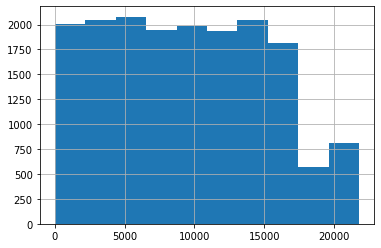

In [ ]:
df['Object ID'].hist()

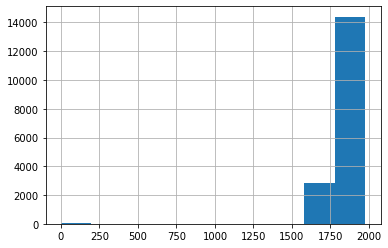

In [ ]:
df['Object Begin Date'].hist()

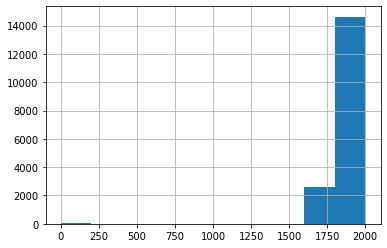

In [ ]:
df['Object End Date'].hist()

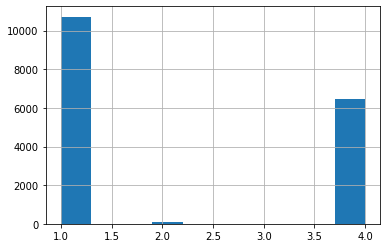

In [22]:
df['Artist Role'].hist()

>From the date above, we can see that the ealiest art was made at 1829 and ealist finished at 1849.  The latest art has been made at 1976 and the latest finished at 2000. The majority of arts the museum have were from 1829 to 1849. 
Around 3000 arts have been made in from 16th to 18th centuries and more then 14000 arts are from 19th century. 